## Trajectory equations:

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

In [155]:
from sympy import *
init_printing()

In [156]:
Ex, Ey, Ez = symbols("E_x, E_y, E_z")
Bx, By, Bz, B = symbols("B_x, B_y, B_z, B")
x, y, z = symbols("x, y, z")
vx, vy, vz, v = symbols("v_x, v_y, v_z, v")
t = symbols("t")
q, m = symbols("q, m")
c, eps0 = symbols("c, epsilon_0")

The equation of motion:
$$
\begin{gather*}
  m \frac{d^2 \vec{r} }{dt^2} = 
  q \vec{E} + \frac{q}{c} [ \vec{v} \vec{B} ] 
\end{gather*}
$$

In Cortesian coordinates:

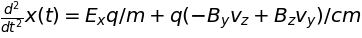

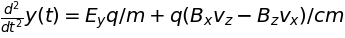

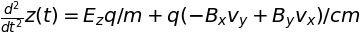

In [157]:
eq_x = Eq( diff(x(t), t, 2), q / m * Ex + q / c / m * (vy * Bz - vz * By) )
eq_y = Eq( diff(y(t), t, 2), q / m * Ey + q / c / m * (-vx * Bz + vz * Bx) )
eq_z = Eq( diff(z(t), t, 2), q / m * Ez + q / c / m * (vx * By - vy * Bx) )
display( eq_x, eq_y, eq_z )

For the case of a uniform magnetic field 
along the $z$-axis: 
$$ \vec{B} = B_z = B, \quad B_x = 0, \quad B_y = 0 $$

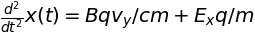

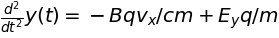

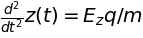

In [158]:
uni_mgn_subs = [ (Bx, 0), (By, 0), (Bz, B) ]

eq_x = eq_x.subs(uni_mgn_subs)
eq_y = eq_y.subs(uni_mgn_subs)
eq_z = eq_z.subs(uni_mgn_subs)
display( eq_x, eq_y, eq_z )

Assuming $E_z = 0$ and $E_y = 0$: 

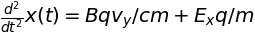

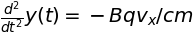

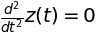

In [159]:
zero_EyEz_subs = [ (Ey, 0), (Ez, 0) ]
eq_x = eq_x.subs(zero_EyEz_subs)
eq_y = eq_y.subs(zero_EyEz_subs)
eq_z = eq_z.subs(zero_EyEz_subs)
display( eq_x, eq_y, eq_z )

Motion is uniform along the $z$-axis:

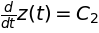

In [160]:
z_eq = dsolve( eq_z, z(t) )
vz_eq = Eq( z_eq.lhs.diff(t), z_eq.rhs.diff(t) )
display( z_eq, vz_eq )

The constants of integration can be found from the initial conditions $z(0) = 0$ and $v_z(0) = v$:

In [161]:
z_0 = 0
v_0 = v
c1_c2_system = []
initial_cond_subs = [(t, 0), (z(0), z_0), (diff(z(t),t).subs(t,0), v_0) ]
c1_c2_system.append( z_eq.subs( initial_cond_subs ) )
c1_c2_system.append( vz_eq.subs( initial_cond_subs ) )

c1, c2 = symbols("C1, C2")
c1_c2 = solve( c1_c2_system, [c1, c2] )
c1_c2

So that

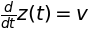

In [162]:
z_sol = z_eq.subs( c1_c2 )
vz_sol = vz_eq.subs( c1_c2 )
display( z_sol, vz_sol )

Now, the equation for $y$ can be integrated:

In [163]:
v_as_diff = [ (vx, diff(x(t),t)), (vy, diff(y(t),t)), (vz, diff(z_sol.lhs,t)) ]
eq_y = eq_y.subs( v_as_diff )
eq_y = Eq( integrate( eq_y.lhs, (t, 0, t) ), integrate( eq_y.rhs, (t, 0, t) ) )
eq_y

d          ⎛d       ⎞│      B⋅q⋅x(0)   B⋅q⋅x(t)
──(y(t)) - ⎜──(y(t))⎟│    = ──────── - ────────
dt         ⎝dt      ⎠│t=0     c⋅m        c⋅m   

For initial conditions $x(0) = x_0, y'(0) = 0$:

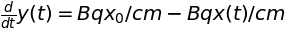

In [164]:
x_0 = Symbol('x_0')
vy_0 = 0
initial_cond_subs = [(x(0), x_0), (diff(y(t),t).subs(t,0), vy_0) ]
vy_sol = eq_y.subs( initial_cond_subs )
vy_sol

This equation can be substituted into the equation for $x$-coorditante:

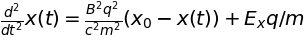

In [165]:
eq_x = eq_x.subs( vy, vy_sol.rhs )
eq_x = Eq( eq_x.lhs, collect( expand( eq_x.rhs ), B *q / c / m ) )
eq_x

An expression for $E_x$ can be taken from the example on ribbon beam in free space $E_x = \dfrac{ 2 \pi I_0 }{v}$:

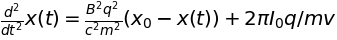

In [166]:
I0 = symbols('I_0')
Ex_subs = [ (Ex, 2 * pi * I0 / v) ]
eq_x = eq_x.subs( ex_subs )
eq_x

This is an oscillator-type equation
$$
x'' + a x + b = 0
$$
with $a$ and $b$ given by

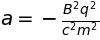

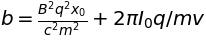

In [167]:
eq_a = Eq(a, eq_x.rhs.expand().coeff(x(t), 1))
eq_b = Eq( b, eq_x.rhs.expand().coeff(x(t), 0) )
display( eq_a , eq_b )

It's solution is given by:

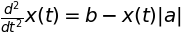

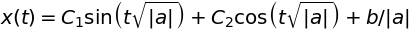

In [168]:
a, b, c = symbols("a, b, c")
osc_eqn = Eq( diff(x(t),t,2), - abs(a)*x(t) + b)
display( osc_eqn )
osc_eqn_sol = dsolve( osc_eqn )

osc_eqn_sol

From initial conditions $x(0) = x_0, v_0 = 0$:

In [169]:
x_0 = symbols( 'x_0' )
v_0 = 0
c1_c2_system = []
initial_cond_subs = [(t, 0), (x(0), x_0), (diff(x(t),t).subs(t,0), v_0) ]
c1_c2_system.append( osc_eqn_sol.subs( initial_cond_subs ) )

osc_eqn_sol_diff = Eq( osc_eqn_sol.lhs.diff(t), osc_eqn_sol.rhs.diff(t) )
c1_c2_system.append( osc_eqn_sol_diff.subs( initial_cond_subs ) )

c1, c2 = symbols("C1, C2")
c1_c2 = solve( c1_c2_system, [c1, c2] )
c1_c2

So that

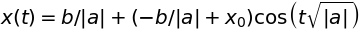

In [170]:
x_sol = osc_eqn_sol.subs( c1_c2 )
x_sol

Taking into account that 
$$ \sqrt{|a|} = \omega_g = \frac{ q B }{mc } $$
where $\omega_g$ is the gyrofrequency, and since

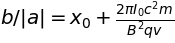

In [171]:
b_over_a = simplify( eq_b.rhs / abs( eq_a.rhs ).subs( abs( eq_a.rhs ), -eq_a.rhs ) )
Eq( b/abs(a), b_over_a )

It is possible to rewrite the solution as

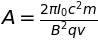

In [178]:
omega_g = symbols('omega_g')
eq_omega_g = Eq( omega_g, q * B / m / c )
A = symbols('A')
eq_A = Eq( A, b_over_a - x_0 )
subs_list = [ (b/abs(a), b_over_a), ( sqrt( abs(a) ), omega_g ), ( eq_A.rhs, eq_A.lhs) ]
x_sol = x_sol.subs( subs_list )
display( x_sol, eq_A, eq_omega_g )

From the laws of motion for $x(t)$ and $z(t)$

In [173]:
display( x_sol, z_sol )

it is possible to obtain a trajectory equation:

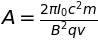

In [179]:
t_from_z = solve( z_sol.subs(z(t),z), t )[0]
x_z_traj = Eq( x_sol.lhs.subs( t, z ), x_sol.rhs.subs( [(t, t_from_z)] ) )
display( x_z_traj, eq_A, eq_omega_g )